In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.express as px

In [512]:
#Loading the dataset

data=pd.read_csv('dataset_1.csv')

#Verifying the output by printing first 5 rows of the dataset

data.head(6)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


In [513]:
data.shape

(270, 14)

In [514]:
data.dtypes

Age int64
Sex int64
Chest pain type int64
BP int64
Cholesterol int64
FBS over 120 int64
EKG results int64
Max HR int64
Exercise angina int64
ST depression float64
Slope of ST int64
Number of vessels fluro int64
Thallium int64
Heart Disease object
dtype: object

In [515]:
data.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [516]:
# Converting target variables into numerical va;ue using One Hot Encoding



dummies = pd.get_dummies(data['Heart Disease'])
merged_data = pd.concat([data,dummies],axis=1)  
new_data = merged_data.drop(['Heart Disease'], axis=1)
new_data = new_data.drop(['Absence'], axis=1)
new_data.rename(columns = {'Presence':'Heart Disease Predicted'}, inplace = True)







In [517]:
new_data.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Predicted
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [518]:
print(new_data.dtypes)

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease Predicted      uint8
dtype: object


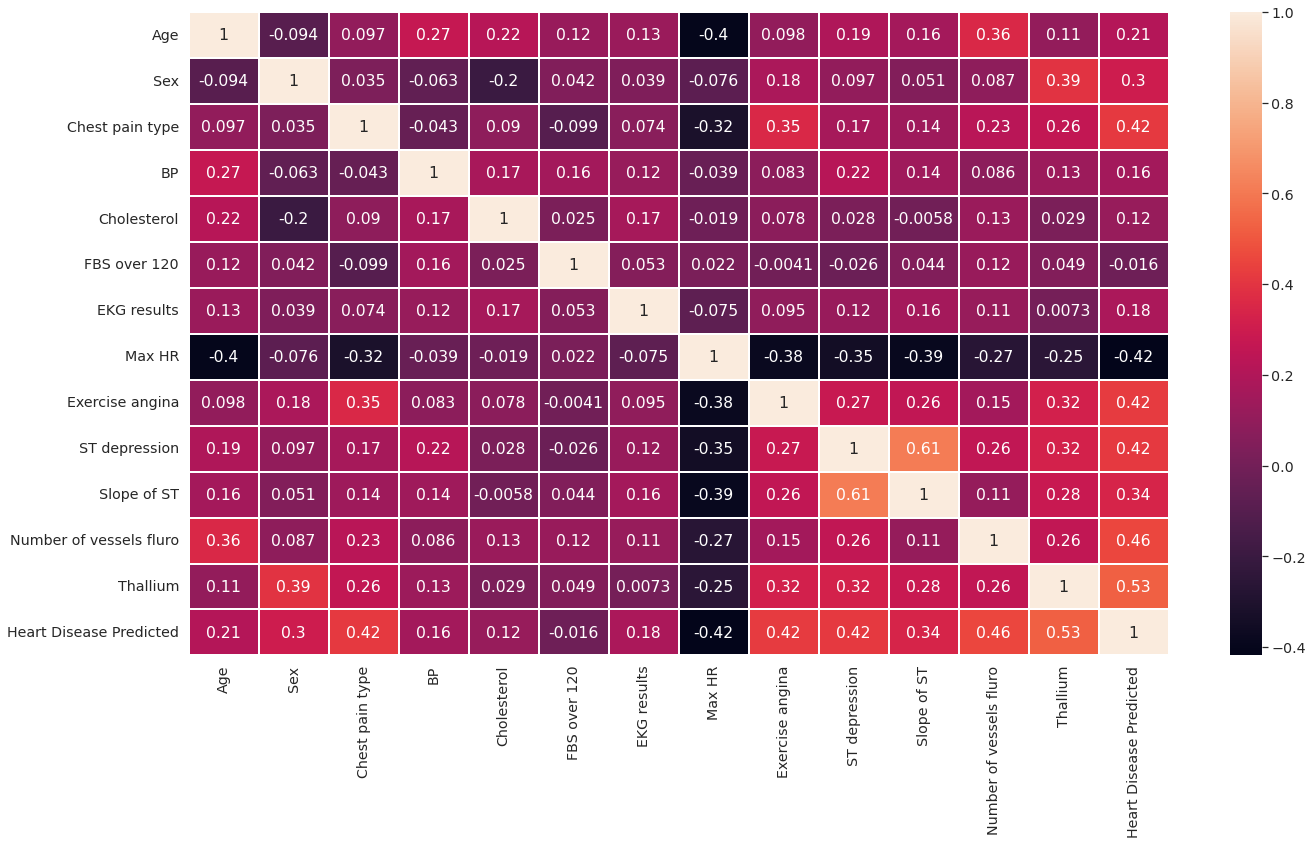

In [519]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(new_data.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [520]:
print(new_data['Age'])

0      70
1      67
2      57
3      64
4      74
       ..
265    52
266    44
267    56
268    57
269    67
Name: Age, Length: 270, dtype: int64


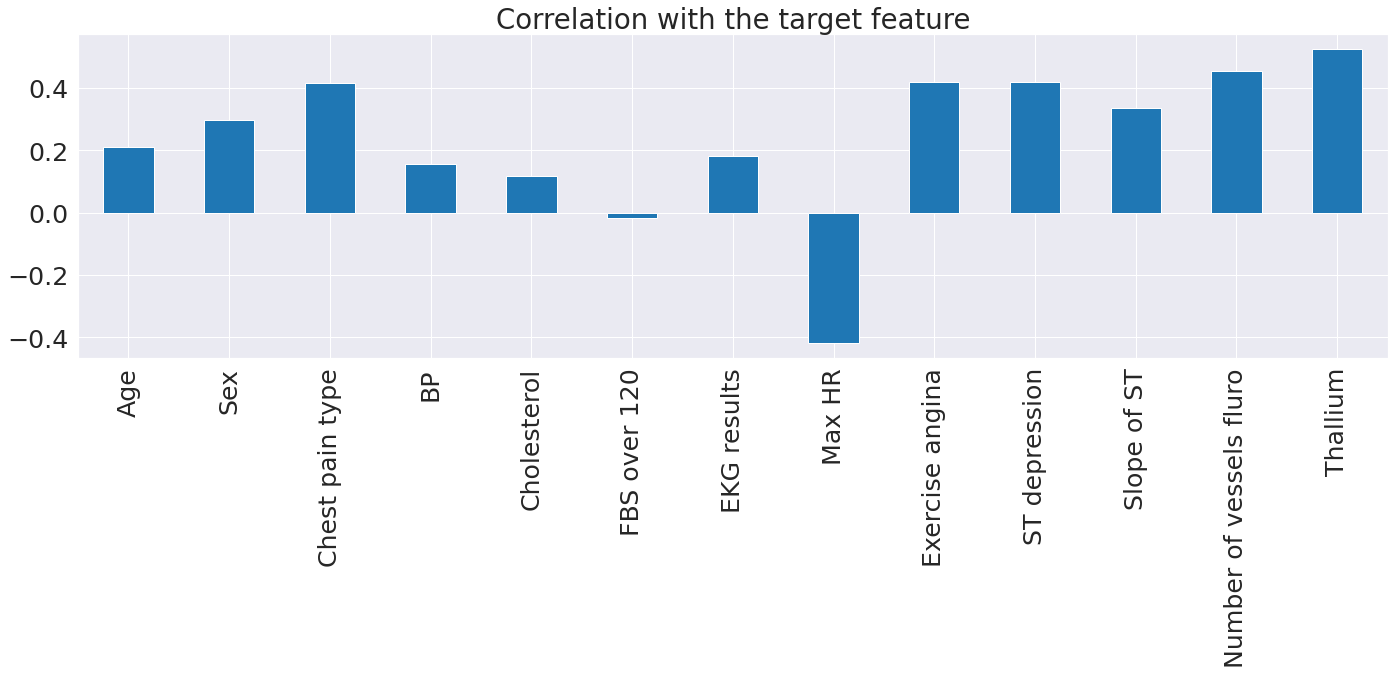

In [521]:
sns.set_context('notebook',font_scale = 2.3)
new_data.drop('Heart Disease Predicted', axis=1).corrwith(new_data['Heart Disease Predicted']).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [522]:
new_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Predicted
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


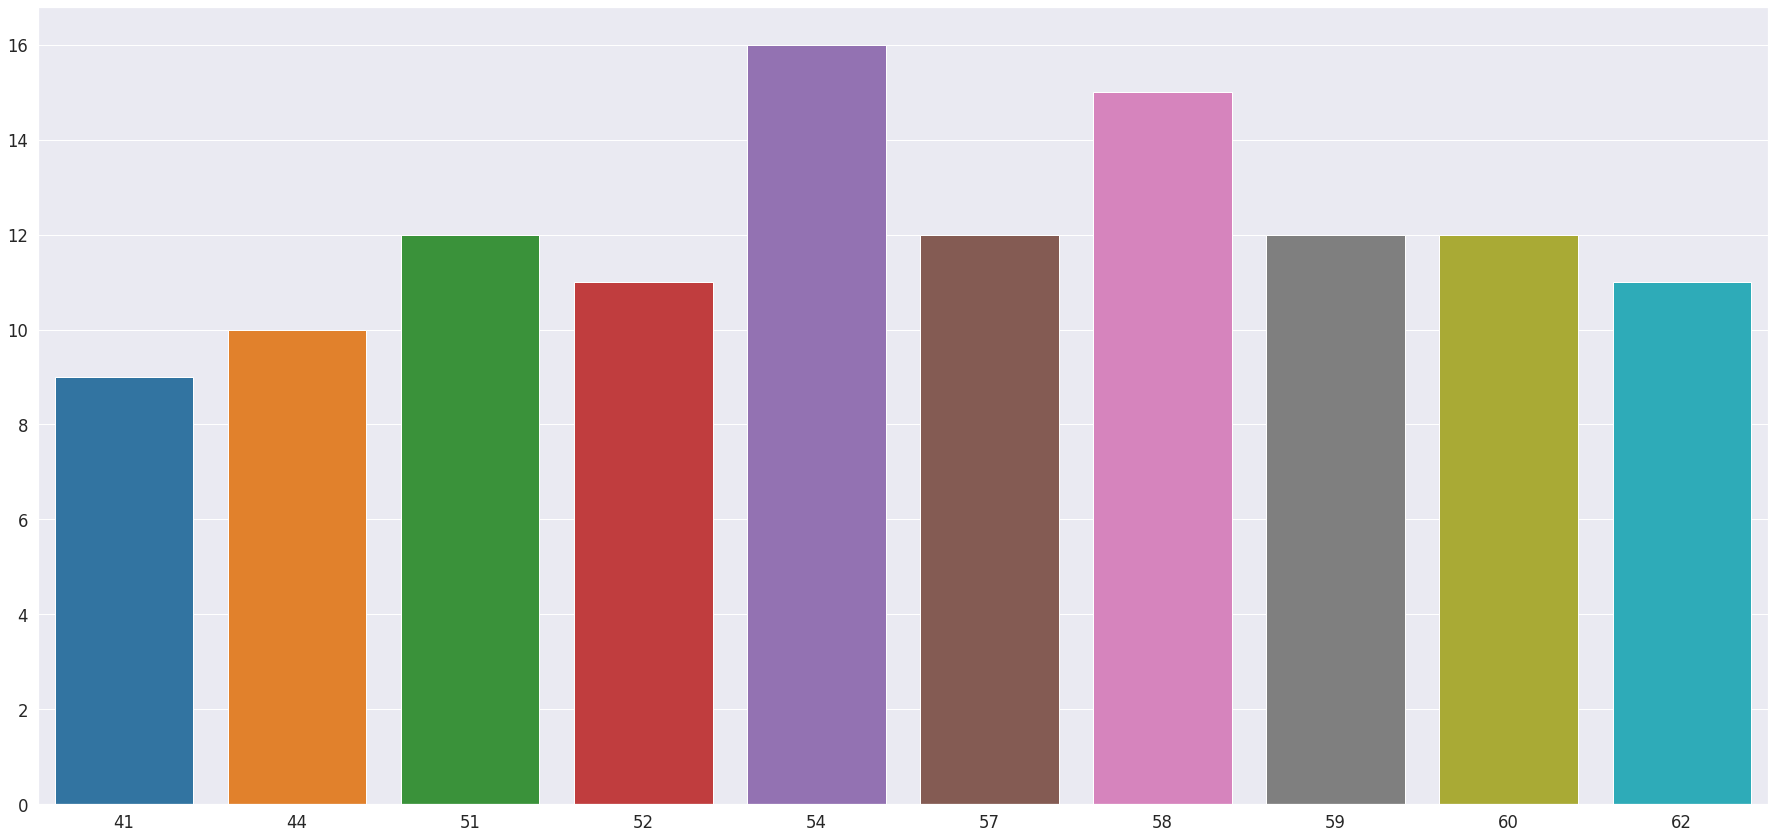

In [523]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=new_data['Age'].value_counts()[:10].index,y=new_data['Age'].value_counts()[:10].values)
plt.tight_layout()

In [524]:
minAge=min(new_data['Age'])
maxAge=max(new_data['Age'])
meanAge=new_data['Age'].mean()
print('Minimum Age :',minAge)
print('Maximum Age :',maxAge)
print('Mean Age :',meanAge)

Minimum Age : 29
Maximum Age : 77
Mean Age : 54.43333333333333


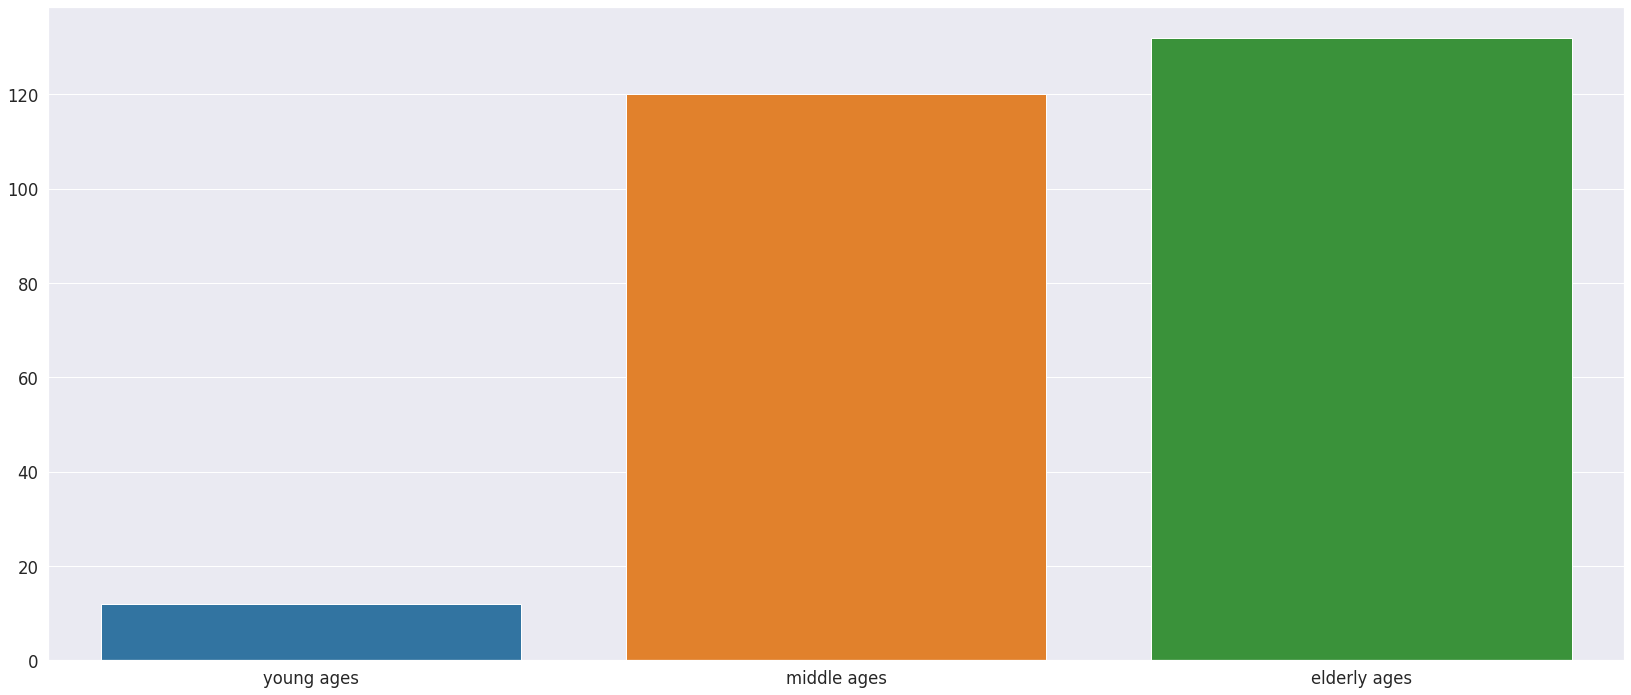

In [525]:
Young = new_data[(new_data['Age']>=29)&(new_data['Age']<40)]
Middle = new_data[(new_data['Age']>=40)&(new_data['Age']<55)]
Elder = new_data[(new_data['Age']>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

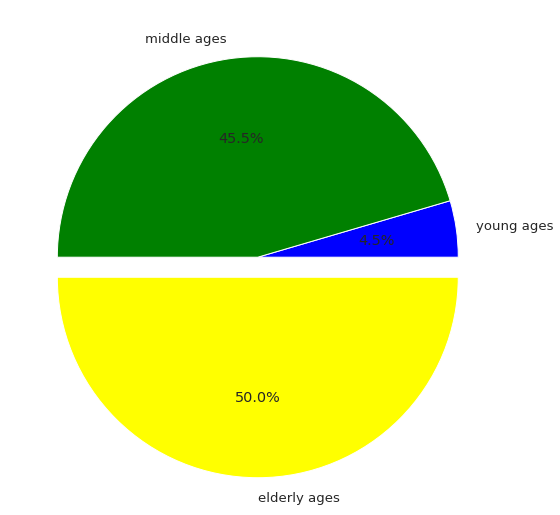

In [526]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

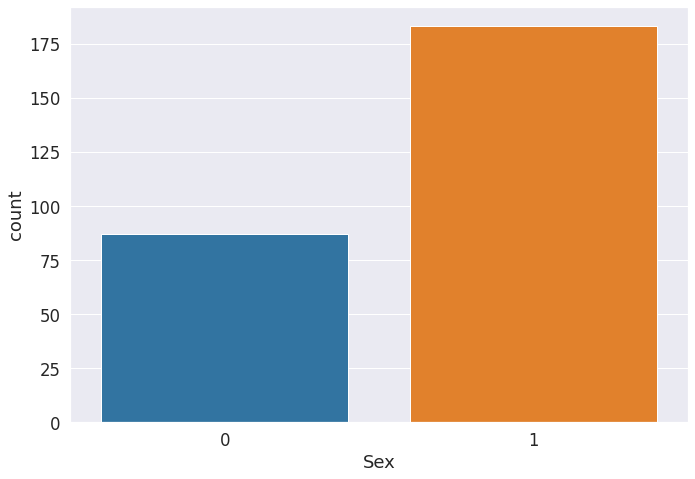

In [527]:
plt.figure(figsize=(10,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Sex'])
plt.tight_layout()

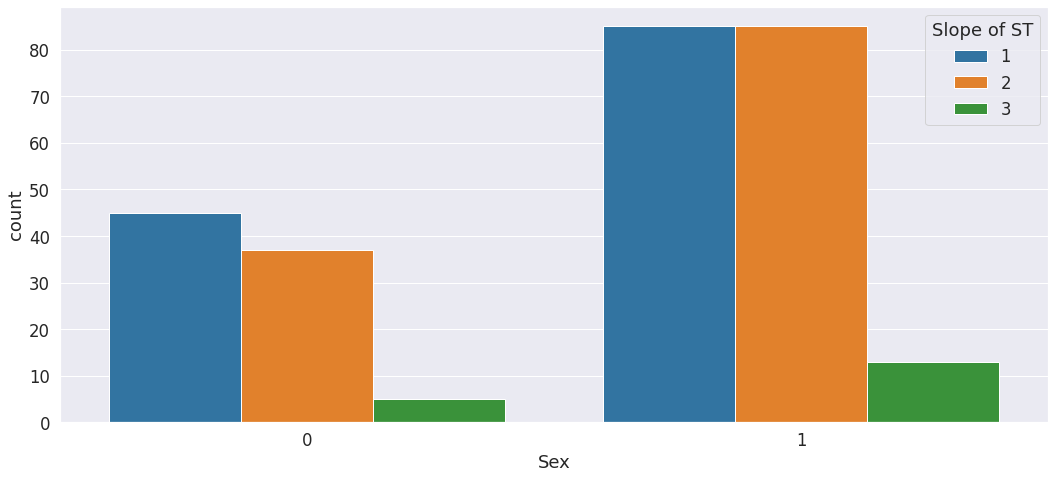

In [528]:
plt.figure(figsize=(15,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Sex'],hue=data["Slope of ST"])
plt.tight_layout()

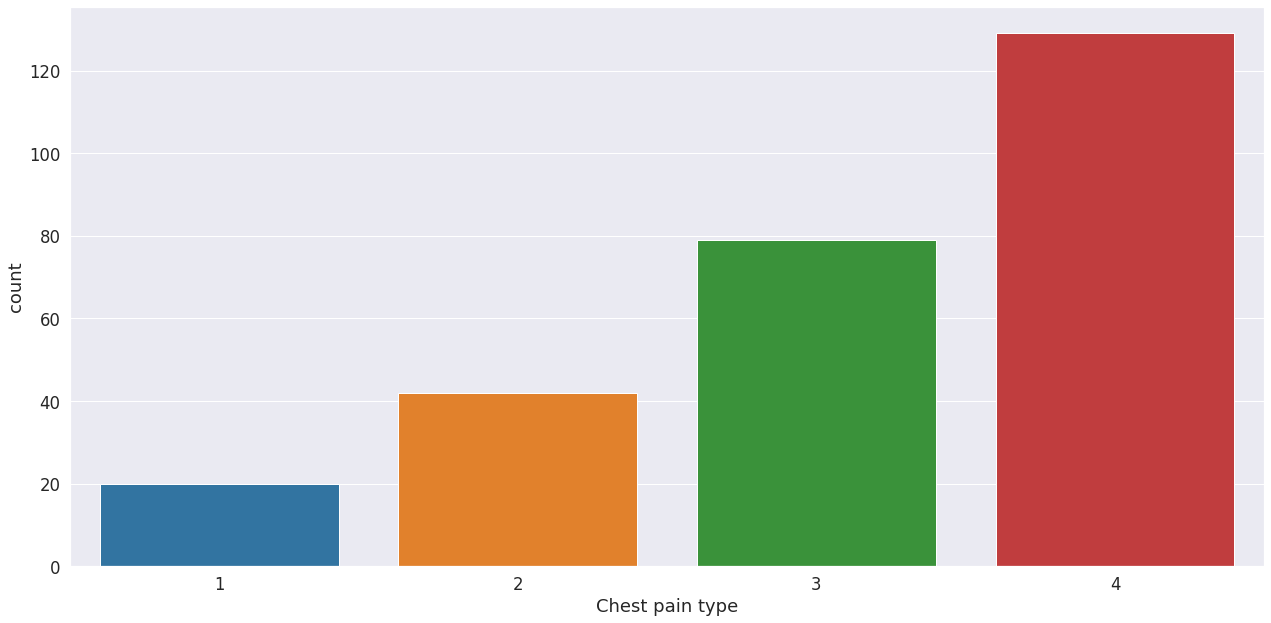

In [529]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Chest pain type'])
plt.tight_layout()

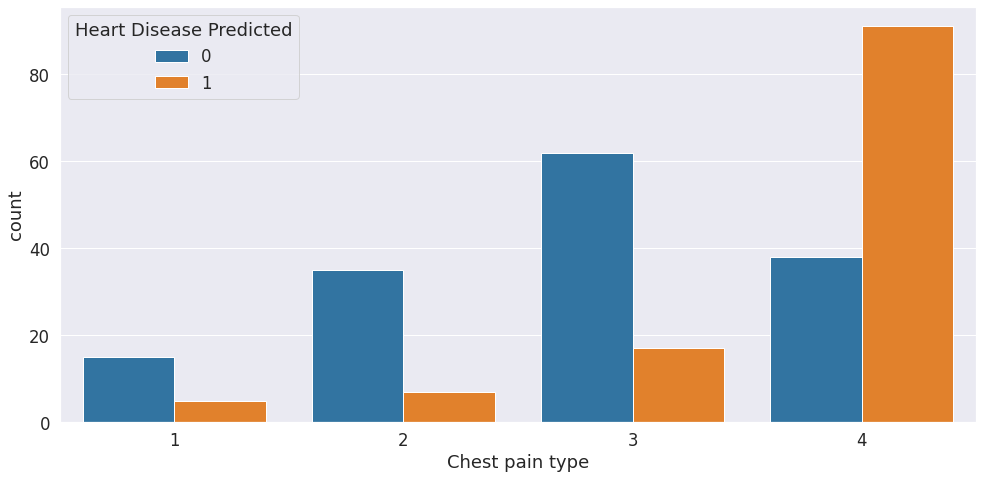

In [530]:
plt.figure(figsize=(14,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['Chest pain type'],hue=new_data["Heart Disease Predicted"])
plt.tight_layout()

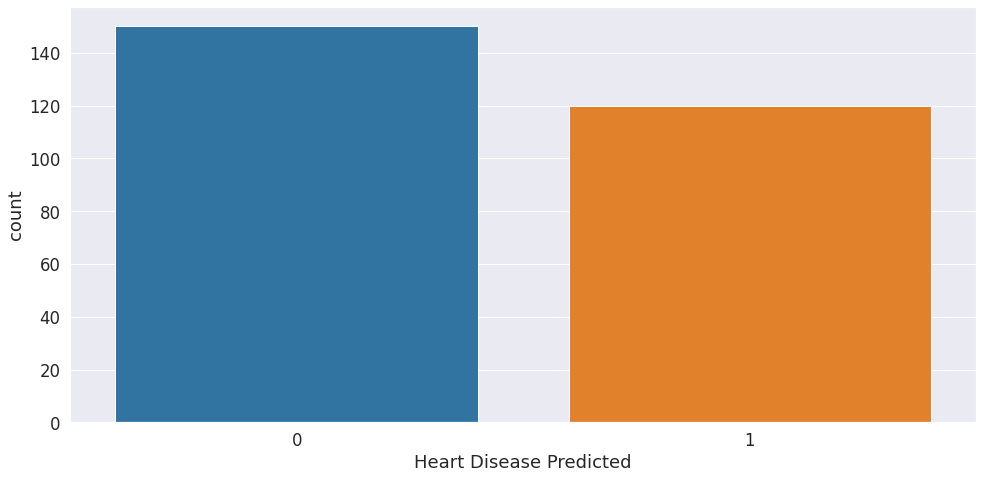

In [531]:
plt.figure(figsize=(14,7))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(new_data['Heart Disease Predicted'])
plt.tight_layout()

In [532]:
new_data=pd.read_csv('dataset_2.csv')

In [533]:
#Splitting the dataset into training and testing 

X, y = new_data.iloc[:, :-1], new_data.iloc[:, -1]

print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [534]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X = sc.fit_transform(X)

In [535]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

#Printing the test Data
print(X_test)
print(y_test)

[[ 0.18017482 -1.46841752 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.40075247  0.68100522  1.00257707 ... -0.64911323  0.26508221
   1.12302895]
 [ 1.06248543  0.68100522  1.00257707 ... -0.64911323 -0.71442887
   1.12302895]
 ...
 [ 0.29046364  0.68100522  1.00257707 ... -0.64911323  0.26508221
   1.12302895]
 [-0.26098049  0.68100522  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 [ 0.62133012  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]]
246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64


In [536]:
print ("Training_set_x shape: " + str(X_train.shape))
print ("Training_set_y shape: " + str(y_train.shape))
print ("Testing_set_x shape: " + str(X_test.shape))
print ("Testing_set_y shape: " + str(y_test.shape))

Training_set_x shape: (212, 13)
Training_set_y shape: (212,)
Testing_set_x shape: (91, 13)
Testing_set_y shape: (91,)


# MODELS

# Decision Tree Classifier

In [537]:
scores_dict = {}

Catagory=['No','Yes']


In [538]:

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [539]:

prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [540]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print("Accuracy with Descion Tree Classifier: " +str(accuracy_dt))

Accuracy with Descion Tree Classifier: 75.82417582417582


In [541]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [542]:
# Target variable of testing dataset
y_test

246 0
183 0
229 0
126 1
184 0
 ..
69 1
21 1
210 0
78 1
174 0
Name: target, Length: 91, dtype: int64

In [543]:
# Predicted values
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
 1, 1, 0])

In [544]:

# Predicting with new point
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)
print(X_DT_prediction[0])
print(Catagory[int(X_DT_prediction[0])])




0
No


# KNN

In [545]:
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,26)

scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:

    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)

    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))

print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.8571428571428571


In [546]:
#Plotting accuracy for different values of k 


px.line(x=k_range,y=scores_list)

In [547]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)


prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score :',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error :',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score : 85.71428571428571 %
mean_squared_error : 14.285714285714285 %


In [548]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
print("Accuracy with KKN: " +str(accuracy_knn))



Accuracy with KKN: 85.71428571428571


In [549]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))


Accuracy on training set: 0.868
Accuracy on test set: 0.857


In [550]:
#Predicting with new point
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn=sc.transform(X_knn)
X_knn_prediction=knn.predict(X_knn)
print(X_knn)


[[ 0.9521966   0.68100522  1.97312292  0.76395577 -0.25633371  2.394438
  -1.00583187  0.01544279 -0.69663055  1.08733806 -2.27457861 -0.71442887
  -2.14887271]]


In [551]:

print(X_knn_prediction[0])
print(Catagory[int(X_knn_prediction[0])])

0
No


# Support Vector Classifier

In [552]:
from sklearn.svm import SVC

model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(y_test,Y_predict)*100

Accuracy score : 81.31868131868131%


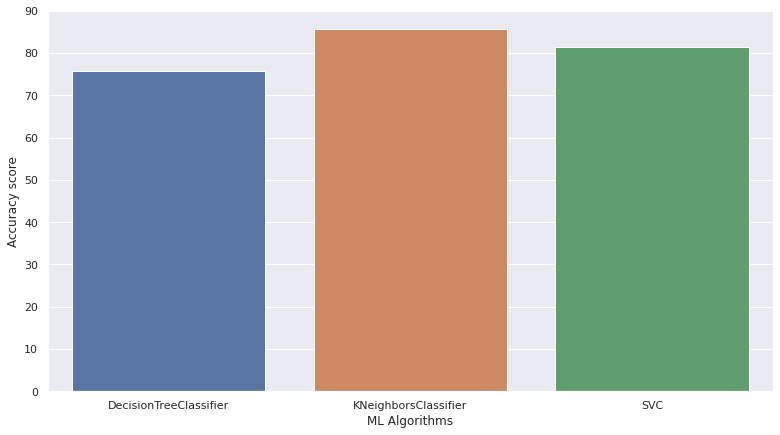

In [553]:
#Plotting the accuracy of different Algorithms 

with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(13,7)})
  plt.xlabel("ML Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

# Performing K Fold Cross Validation

In [578]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


acc_scores={}
cv = KFold(n_splits=3,shuffle=True)
cv_score_lr = cross_val_score(DecisionTreeClassifier(), X, y, cv=cv)
print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print("Mean Accuracy In Desicion Tree Classifier: "+str(mean_accuracy_lr)+"%")
acc_scores['Desicion Tree Classifer']=mean_accuracy_lr



[0.74257426 0.86138614 0.73267327]
Mean Accuracy In Desicion Tree Classifier: 77.89%


In [600]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=3, shuffle=True)
cv_score_lr = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)
print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print("Mean Accuracy In KNN: "+str(mean_accuracy_lr)+"%")
acc_scores['K Neighbors Classifier']=mean_accuracy_lr

[0.81188119 0.78217822 0.84158416]
Mean Accuracy In KNN: 81.19%


In [599]:
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=3,  shuffle=True)
cv_score_lr = cross_val_score(SVC(), X, y, cv=cv)
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr, 2)
print("Mean Accuracy In SVC: "+str(mean_accuracy_lr)+"%")
acc_scores['SVC']=mean_accuracy_lr

[0.79207921 0.78217822 0.84158416]
Mean Accuracy In SVC: 80.53%


# Comparing the 3 Models 

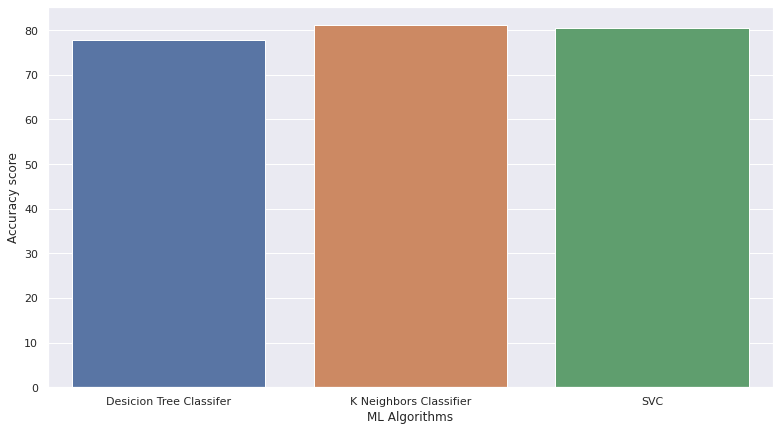

In [601]:
with sns.color_palette('muted'):
  algo_name = list(acc_scores.keys())
  scores = list(acc_scores.values())

  sns.set(rc={'figure.figsize':(13,7)})
  plt.xlabel("ML Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scores)

# Conclusion: Among the 3 algorithms , KNN has the highest accuracy